In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/i - 1305.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/i - 608.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/i - 541.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/i - 811.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/377.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/215.jpg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/i - 109.jpeg
/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/sculpture/i - 1318.jpeg
/kaggle/

In [2]:
import numpy as np

In [3]:
# Path module of pathlib is used to store path
from pathlib import Path

training_data = Path('/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/training_set/') 
validation_data = Path('/kaggle/input/art-images-drawings-painting-sculpture-engraving/musemart/dataset_updated/validation_set/') 

In [4]:
# Create a dictionary to map the labels to integers
labels_dict= {'drawings':0, 'engraving':1, 'iconography':2, 'painting':3, 'sculpture':4}

In [5]:
import pandas as pd
import os
import glob

def dataframe(path):
    
    # Creating an empty list to store the image name and their labels.
    df = []
    
    
    for folder in os.listdir(path):
        # Define the path to the images
        imgs_path = path / folder
        
        # Get the list of all the images stored in that directory
        imgs = sorted(imgs_path.glob('*.jpg'))
        
        # Store each image path and corresponding label 
        for img_name in imgs:
            df.append((str(img_name), labels_dict[folder]))

        
    df = pd.DataFrame(df, columns=['image', 'label'], index=None)
    
    # shuffle the dataset 
    df = df.sample(frac=1.).reset_index(drop=True)
    
    # Remove the extra columns and make data presentable
    i = df.columns.get_loc('image')
    df2 = df['image'].str.split("/", expand=True)
    df_1 = pd.concat([df.iloc[:, :i], df2, df.iloc[:, i+1:]], axis=1)
    df_2 = df_1.drop([1, 2, 3, 4, 5, 6, 7], axis = 1)
    df = df_2.rename({0:'S.No', 8: 'Type', 9: 'Image'}, axis = 1)
            
    return df

In [6]:
# printing train data set
train_df = dataframe(training_data)
train_df.head()

,S.No,Type,label
0,,252.jpg,4
1,,1684.jpg,3
2,,2123.jpg,3
3,,1631.jpg,3
4,,1391.jpg,3


In [7]:
# Printing validation dataset
valid_df = dataframe(validation_data)
valid_df.head()

,S.No,Type,label
0,,144.jpg,4
1,,0295.jpg,3
2,,345.jpg,2
3,,184.jpg,4
4,,185.jpg,2


In [8]:
# How many samples do we have in our training and validation data?
print("Number of traininng samples: ", len(train_df))
print("Number of validation samples: ", len(valid_df))

Number of traininng samples:  3550
Number of validation samples:  242


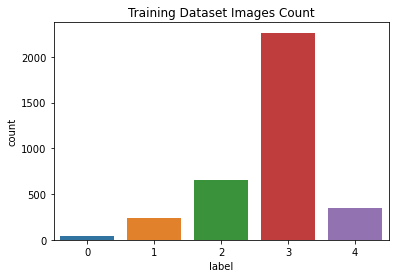

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(train_df['label']).set_title('Training Dataset Images Count');

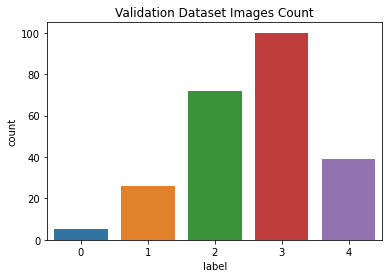

In [10]:
sns.countplot(valid_df['label']).set_title('Validation Dataset Images Count');

In [11]:
# features description -1:  Hu Moments
import cv2

def fd_hu_moments(image):
    # convert image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the HuMoments feature 
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [12]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 888 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
# feature-descriptor -2 Haralick Texture 
import mahotas

def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # Compute the haralick texture feature 
    haralic = mahotas.features.haralick(gray).mean(axis=0)
    
    # return harlic feature
    return haralic

In [14]:
# feature-description -3 Color Histogram

def fd_histogram(image, mask=None):
    # conver the image to HSV colors-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    #COPUTE THE COLOR HISTPGRAM
    hist  = cv2.calcHist([image],[0,1,2],None,[bins,bins,bins], [0, 256, 0, 256, 0, 256])
    
    # normalize the histogram
    cv2.normalize(hist,hist)
    
    # return the histog
    return hist.flatten()

In [15]:
# get the training data labels 
labels_name = os.listdir(training_data)

# sort the training labesl 
labels_name.sort()
print(labels_name)

# bins for histograms 
bins = 8

['drawings', 'engraving', 'iconography', 'painting', 'sculpture']


In [16]:
def feature_extraction(labels, path):
    # empty list to hold feature vectors and labels 
    global_features = []
    labels = []
    Images = []
    
    i, j = 0, 0 
    k = 0

    # itirate the folder to get the image label name
    # loop over the sub folder 

    # make a fix file size
    fixed_size  = tuple((500,500))

    

    for name in labels_name:
    # join the training data path and each species training folder
        dir = os.path.join(path, name)

        # get the current training label
        current_label = name
        

        k = 1
        # loop over the images in each sub-folder
        
        for file in os.listdir(dir):

            file = dir + "/" + os.fsdecode(file)
       
            # read the image and resize it to a fixed-size
            image = cv2.imread(file) 
        
            if image is not None:
                image = cv2.resize(image,fixed_size)
                fv_hu_moments = fd_hu_moments(image)
                fv_haralick   = fd_haralick(image)
                fv_histogram  = fd_histogram(image)
            
                Images.append(image)
       

            # Concatenate global features
            global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

            # update the list of labels and feature vectors
            labels.append(current_label)
            global_features.append(global_feature)

            i += 1
            k += 1
        print("Current processed folder: {}".format(current_label))
        j += 1

    print("Completed Global Feature Extraction...")
    
    return global_features, labels, Images

In [17]:
global_features, labels, Images = feature_extraction(labels_name, training_data)

Current processed folder: drawings
Current processed folder: engraving
Current processed folder: iconography
Current processed folder: painting
Current processed folder: sculpture
Completed Global Feature Extraction...


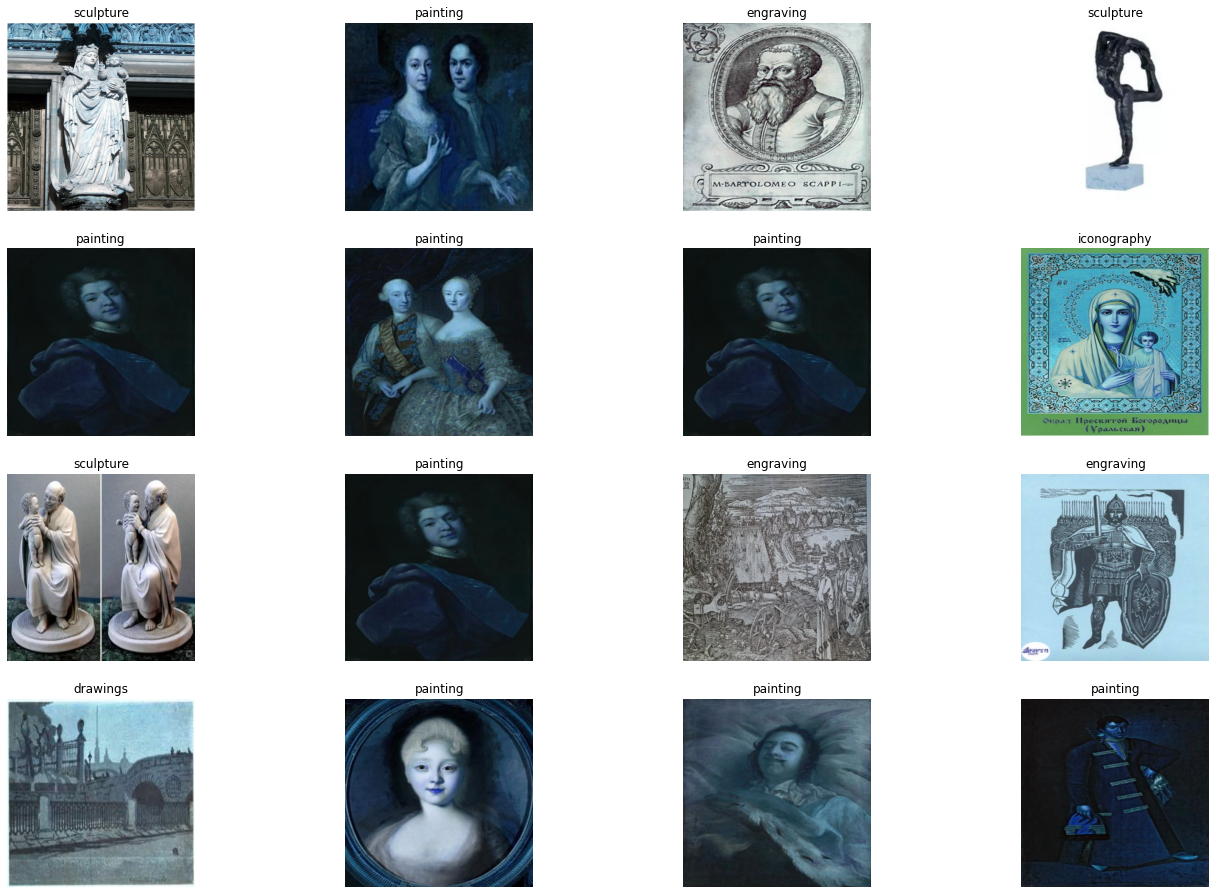

In [18]:
from random import randint

f,ax = plt.subplots(4,4) 
f.subplots_adjust(0,0,3,3)

for i in range(0,4,1):
    for j in range(0,4,1):
        rnd_number = randint(0,len(Images))
        
        ax[i,j].imshow(Images[rnd_number])
        ax[i, j].set_title(labels[rnd_number])
        ax[i,j].axis('off')

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# get the overall feature vector size
print("Training feature vector size: {}".format(np.array(global_features).shape))

# get the overall training label size
print("Training Labels: {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
print('The target names are: {}'.format(targetNames))
le = LabelEncoder()
target = le.fit_transform(labels)
print("Number of training labels encoded: {}".format(len(target)))


# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("All feature vectors are normalized.")

print("Training labels: {}".format(target))
print("Training data labels shape: {}".format(target.shape))

X = np.array(rescaled_features)
y = np.array(target)

Training feature vector size: (3828, 532)
Training Labels: (3828,)
The target names are: ['drawings' 'engraving' 'iconography' 'painting' 'sculpture']
Number of training labels encoded: 3828
All feature vectors are normalized.
Training labels: [0 0 0 ... 4 4 4]
Training data labels shape: (3828,)


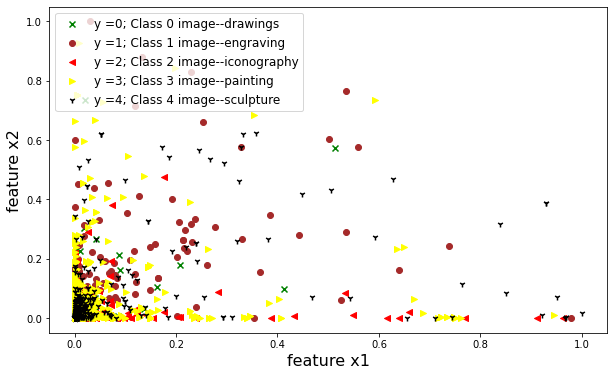

In [20]:
idx_0 = np.where(y == 0) # indices of class 0 images
idx_1 = np.where(y == 1) # indices of class 0 images
idx_2 = np.where(y == 2) # indices of not class 0 images
idx_3 = np.where(y == 3) # indices of class 0 images
idx_4 = np.where(y == 4) # indices of not class 0 images

# Plot scatterplot of dataset with different markings for class 0 images
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(X[idx_0, 0], X[idx_0, 1], c='green', marker ='x', label='y =0; Class 0 image--drawings')
axes.scatter(X[idx_1, 0], X[idx_1, 1], c='brown', marker ='o', label='y =1; Class 1 image--engraving')
axes.scatter(X[idx_2, 0], X[idx_2, 1], c='red', marker ='<', label='y =2; Class 2 image--iconography')
axes.scatter(X[idx_3, 0], X[idx_3, 1], c='yellow', marker ='>', label='y =3; Class 3 image--painting')
axes.scatter(X[idx_4, 0], X[idx_4, 1], c='black', marker ='1', label='y =4; Class 4 image--sculpture')

# Set axis labels and legend
axes.legend(loc='upper left', fontsize=12)
axes.set_xlabel('feature x1', fontsize=16)
axes.set_ylabel('feature x2', fontsize=16)
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

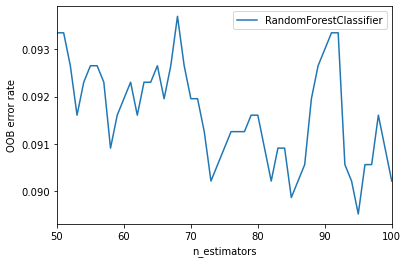

In [22]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier


ensemble_clfs = [ ("RandomForestClassifier",RandomForestClassifier(warm_start=True, 
                                                    max_features=None, oob_score=True, 
                                                                   random_state = 0))]


error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


min_estimators = 50
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
from sklearn import metrics
target_names = ['class 0: drawing', 'class 1: engraving', 'class 2: iconography', 'class 3: painting', 
                'class 4: sculpture']
print(metrics.classification_report(y_pred, y_test, target_names=target_names))

                      precision    recall  f1-score   support

    class 0: drawing       0.46      0.84      0.59        25
  class 1: engraving       0.76      0.93      0.83        54
class 2: iconography       0.94      0.85      0.89       189
   class 3: painting       0.96      0.93      0.95       555
  class 4: sculpture       0.78      0.78      0.78       134

            accuracy                           0.89       957
           macro avg       0.78      0.87      0.81       957
        weighted avg       0.90      0.89      0.90       957



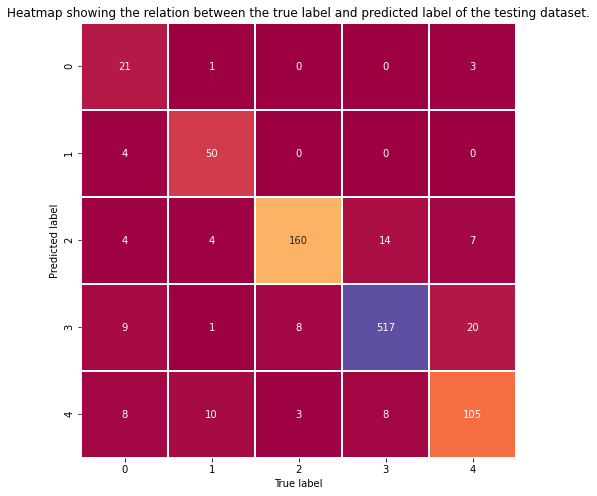

In [25]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(8,8))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True,cbar = False, annot=True, fmt='d', cmap="Spectral",
            linewidths=.5)
plt.title('Heatmap showing the relation between the true label and predicted label of the testing dataset.')
plt.xlabel('True label')
plt.ylabel('Predicted label');

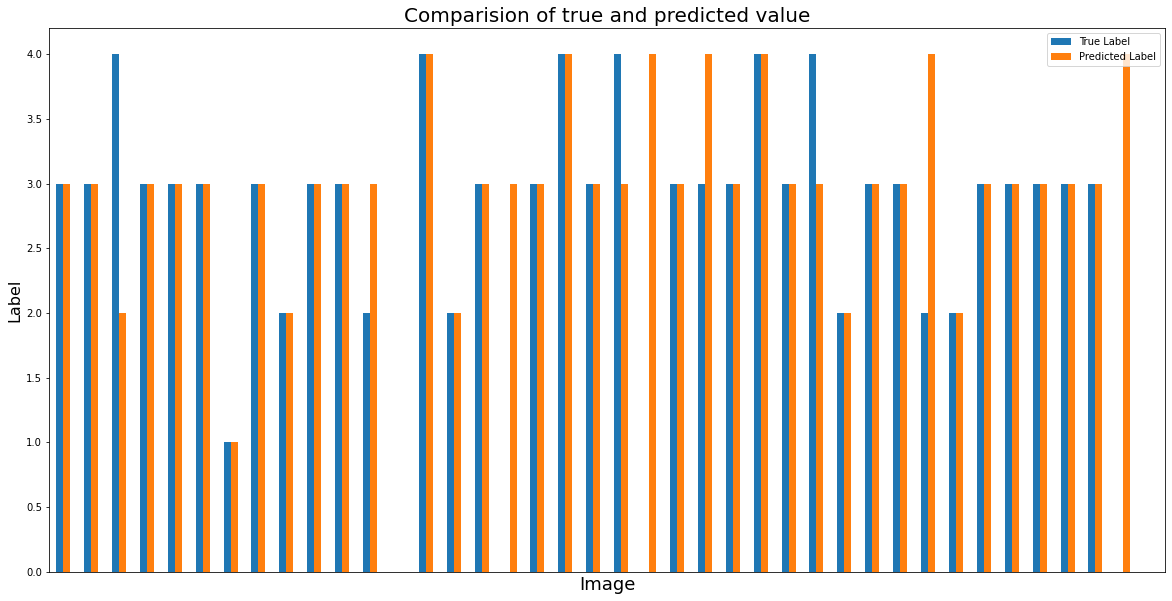

In [26]:
df = pd.DataFrame({'True Label':y_test, 'Predicted Label':y_pred})
#fig,ax = plt.plot()
ax = df.sample(40).plot(figsize=(20,10), kind = 'bar')
plt.title('Comparision of true and predicted value', fontsize=20)
plt.xlabel('Image', fontsize=18)
plt.ylabel('Label', fontsize=16)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()